In [149]:
import pandas as pd
import seaborn as sns

In [163]:
data = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-03-28.xlsx')
pd.to_datetime(data['dateRep']);

In [168]:
def countryFilter(data, Country):
    Country = [f"{Country}"]
    df = data[data.countriesAndTerritories.isin(Country)]
    return df

countryFilter(data=data, Country='United_Kingdom')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
6981,2020-03-28,28,3,2020,2885,181,United_Kingdom,UK,GBR,66488991.0
6982,2020-03-27,27,3,2020,2129,115,United_Kingdom,UK,GBR,66488991.0
6983,2020-03-26,26,3,2020,1452,41,United_Kingdom,UK,GBR,66488991.0
6984,2020-03-25,25,3,2020,1427,87,United_Kingdom,UK,GBR,66488991.0
6985,2020-03-24,24,3,2020,967,54,United_Kingdom,UK,GBR,66488991.0
...,...,...,...,...,...,...,...,...,...,...
7065,2020-01-04,4,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7066,2020-01-03,3,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7067,2020-01-02,2,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0
7068,2020-01-01,1,1,2020,0,0,United_Kingdom,UK,GBR,66488991.0


In [7]:
import plotly.express as px

In [181]:
fig = px.line(data, x=data.dateRep, y=data.cases, color=data.countriesAndTerritories, title='Covid Cases and Deaths all countries')
fig.show()

In [182]:
import plotly.graph_objects as go
import numpy as np

x = countryFilter(data=data, Country='United_Kingdom').cases
y = countryFilter(data=data, Country='United_Kingdom').deaths

fig = go.Figure()
fig.add_trace(go.Scatter(x=df2.dateRep, y=x, name="cases"))

fig.add_trace(go.Scatter(x=df2.dateRep, y=y, name="deaths"))

fig.add_trace(go.Scatter(x=df2.dateRep, y=x.head(), name="Cases Last 5 days"))

fig.add_trace(go.Scatter(x=df2.dateRep, y=y.head(), name="Deaths Last 5 days"))

fig.update_traces(mode='lines+markers')
fig.update_layout(title='COVID-19 Cases and deaths UK' ,  legend=dict(y=0.5, traceorder='reversed', font_size=16))
fig.update
fig.show()

In [197]:
## Total sum of cases 
sumCases = x.sum()

In [198]:
## Total sum of cases last 5 days
sumCasesFive = x.head(5).sum()

In [199]:
## Total sum of deaths
sumDeaths = y.sum()

In [200]:
## Total sum of deaths last 5 days
sumDeathsFive = y.head(5).sum()

In [201]:
CasesFiveDaysAgo = countryFilter(data=data, Country='United_Kingdom').cases.head(5)[-1:]
CasesFiveDaysAgoDF = pd.DataFrame(CasesFiveDaysAgo)
#CasesFiveDaysAgoDF

In [202]:
CasesToday = countryFilter(data=data, Country='United_Kingdom').cases.head(1)
#CasesToday

In [203]:
CasesTodayDF = pd.DataFrame(CasesToday)

In [204]:
frames = [CasesFiveDaysAgoDF, CasesTodayDF]
CasesCompareFive = pd.concat(frames, axis=0).reset_index(drop=True)
CasesCompareFive = CasesCompareFive.rename(columns={'cases': 'Number of cases'}, index={0: 'FiveDaysAgo', 1: 'Today'})

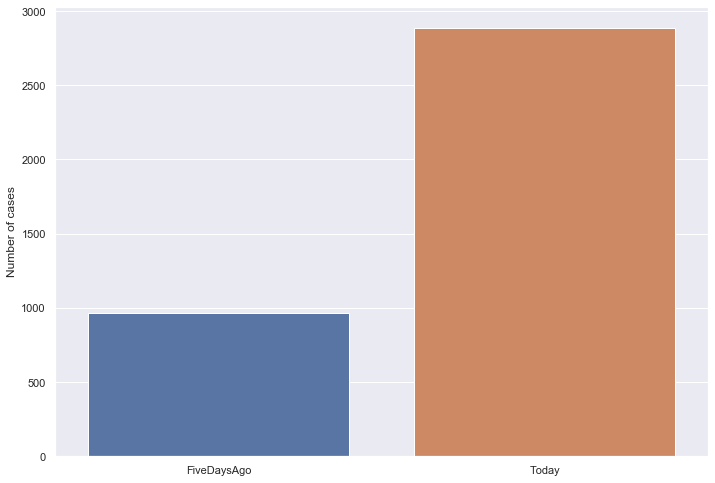

In [205]:
sns.barplot(x=CasesCompareFive.index, y=CasesCompareFive['Number of cases'], data=CasesCompareFive);

In [206]:
CasesCompareFive

,Number of cases
FiveDaysAgo,967
Today,2885


In [207]:
before = CasesCompareFive['Number of cases'][0]

In [208]:
doubledPred = before*2

In [209]:
doubledPred 

1934